In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/msk_2024_mutations_clean.csv')
df

,Gene,Sample,Patient,mutationType,variantType,chr,startPosition,endPosition,proteinPosStart,proteinPosEnd,tumorAlleleFreq,normalAlleleFreq
0,PIK3CA,P-0000015-T01-IM3,P-0000015,Missense_Mutation,SNP,3,178936091,178936091,545,545,0.411765,0.000000
1,TP53,P-0000015-T01-IM3,P-0000015,Missense_Mutation,SNP,17,7577539,7577539,248,248,0.317708,0.000000
2,GATA3,P-0000015-T01-IM3,P-0000015,Frame_Shift_Ins,INS,10,8111513,8111514,333,335,0.165563,0.000000
3,ESR1,P-0000015-T01-IM3,P-0000015,Missense_Mutation,SNP,6,152419920,152419920,536,536,0.365854,0.000000
4,ALK,P-0000015-T01-IM3,P-0000015,Missense_Mutation,SNP,2,29450535,29450535,940,940,0.193416,0.001134
...,...,...,...,...,...,...,...,...,...,...,...,...
205544,YAP1,P-0009406-T01-IM3,P-0009406,Missense_Mutation,SNP,11,102056760,102056760,234,234,0.262338,0.000000
205545,ATM,P-0009406-T01-IM3,P-0009406,Missense_Mutation,SNP,11,108188190,108188190,2097,2097,0.187835,0.000000
205546,KMT2C,P-0009406-T01-IM3,P-0009406,Missense_Mutation,SNP,7,151874919,151874919,2540,2540,0.313312,0.000000
205547,KMT2C,P-0009406-T01-IM3,P-0009406,Frame_Shift_Del,DEL,7,151874913,151874913,2542,2542,0.316393,0.000000


In [2]:
# Add Gene Nodes
gene_counts = df['Gene'].value_counts(normalize=True)
genes_to_keep = gene_counts[gene_counts >= 0.001].index
df = df[df['Gene'].isin(genes_to_keep)]
print(f'Genes kept: {len(genes_to_keep)} out of {len(df["Gene"].unique())}')

genes = df["Gene"].unique()
df["Mutation_Subtype"] = df["Gene"] + "_" + df["mutationType"] + "_" + df["variantType"] + "_chr" + df["chr"].astype(str)
mutation_subtypes = df["Mutation_Subtype"].unique()

print("Number of unique genes:", len(genes))
print("Number of unique mutation subtypes:", len(mutation_subtypes))
df

Genes kept: 262 out of 262
Number of unique genes: 262
Number of unique mutation subtypes: 2792


/tmp/ipykernel_8114/1295475626.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Mutation_Subtype"] = df["Gene"] + "_" + df["mutationType"] + "_" + df["variantType"] + "_chr" + df["chr"].astype(str)


,Gene,Sample,Patient,mutationType,variantType,chr,startPosition,endPosition,proteinPosStart,proteinPosEnd,tumorAlleleFreq,normalAlleleFreq,Mutation_Subtype
0,PIK3CA,P-0000015-T01-IM3,P-0000015,Missense_Mutation,SNP,3,178936091,178936091,545,545,0.411765,0.000000,PIK3CA_Missense_Mutation_SNP_chr3
1,TP53,P-0000015-T01-IM3,P-0000015,Missense_Mutation,SNP,17,7577539,7577539,248,248,0.317708,0.000000,TP53_Missense_Mutation_SNP_chr17
2,GATA3,P-0000015-T01-IM3,P-0000015,Frame_Shift_Ins,INS,10,8111513,8111514,333,335,0.165563,0.000000,GATA3_Frame_Shift_Ins_INS_chr10
3,ESR1,P-0000015-T01-IM3,P-0000015,Missense_Mutation,SNP,6,152419920,152419920,536,536,0.365854,0.000000,ESR1_Missense_Mutation_SNP_chr6
4,ALK,P-0000015-T01-IM3,P-0000015,Missense_Mutation,SNP,2,29450535,29450535,940,940,0.193416,0.001134,ALK_Missense_Mutation_SNP_chr2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205543,TET1,P-0009406-T01-IM3,P-0009406,Missense_Mutation,SNP,10,70405802,70405802,1106,1106,0.193237,0.000000,TET1_Missense_Mutation_SNP_chr10
205545,ATM,P-0009406-T01-IM3,P-0009406,Missense_Mutation,SNP,11,108188190,108188190,2097,2097,0.187835,0.000000,ATM_Missense_Mutation_SNP_chr11
205546,KMT2C,P-0009406-T01-IM3,P-0009406,Missense_Mutation,SNP,7,151874919,151874919,2540,2540,0.313312,0.000000,KMT2C_Missense_Mutation_SNP_chr7
205547,KMT2C,P-0009406-T01-IM3,P-0009406,Frame_Shift_Del,DEL,7,151874913,151874913,2542,2542,0.316393,0.000000,KMT2C_Frame_Shift_Del_DEL_chr7


In [4]:
### **Step 1: Add Nodes (Genes, Mutations, Patients)**
import networkx as nx

# Initialize Heterogeneous Graph
G = nx.Graph()

# for gene in genes:
#     G.add_node(gene, type="gene")

# Group mutations by patient
gene_mutations = df.groupby("Gene")["Mutation_Subtype"].apply(list)
print("Gene mutations:", gene_mutations)

### **Step 3: Add Gene → Mutation Edges (Adjusted Weights)**
for _, row in df.iterrows():
    mutation_node = row["Mutation_Subtype"]
    # gene_node = row["Gene"]
    
    # # Compute weight based on how many mutation subtypes the gene has
    # # occurrence of this particular subtype / total mutation subtypes for that gene
    # total_mutations_for_gene = len(gene_mutations[gene_node])
    # mutation_count_for_subtype = gene_mutations[gene_node].count(mutation_node)
    # weight = mutation_count_for_subtype / total_mutations_for_gene if total_mutations_for_gene > 0 else 0
        
    G.add_node(mutation_node, type="mutation")
    # G.add_edge(gene_node, mutation_node, relation="has_mutation", weight=weight)

# show the number of nodes and edges
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
# Detect all self-loops
self_loops = list(nx.selfloop_edges(G))
print(f"Self-loops found: {self_loops}")
print(f"Total self-loops: {len(self_loops)}")

Gene mutations: Gene
ABL1     [ABL1_Missense_Mutation_SNP_chr9, ABL1_Missens...
AGO2     [AGO2_Missense_Mutation_SNP_chr8, AGO2_Frame_S...
AKT1     [AKT1_Missense_Mutation_SNP_chr14, AKT1_Missen...
AKT3     [AKT3_Missense_Mutation_SNP_chr1, AKT3_Missens...
ALK      [ALK_Missense_Mutation_SNP_chr2, ALK_Missense_...
                               ...                        
U2AF1    [U2AF1_Missense_Mutation_SNP_chr21, U2AF1_Miss...
UPF1     [UPF1_Missense_Mutation_SNP_chr19, UPF1_Frame_...
WT1      [WT1_Missense_Mutation_SNP_chr11, WT1_Missense...
XPO1     [XPO1_Splice_Site_SNP_chr2, XPO1_Missense_Muta...
ZFHX3    [ZFHX3_In_Frame_Del_DEL_chr16, ZFHX3_Missense_...
Name: Mutation_Subtype, Length: 262, dtype: object
Number of nodes: 2792
Number of edges: 0
Self-loops found: []
Total self-loops: 0


In [5]:
import matplotlib.pyplot as plt

### **Step 4: Visualize a Subgraph (Top 20 Genes and Their Mutations)**
# Get top 20 most connected genes
gene_mutation_counts = df.groupby("Gene")["Mutation_Subtype"].nunique().to_dict()

top_genes = sorted(gene_mutation_counts, key=gene_mutation_counts.get, reverse=True)[:20]

# Extract subgraph containing these genes and their connected mutations
subgraph_nodes = set(top_genes)
for gene in top_genes:
    subgraph_nodes.update(nx.neighbors(G, gene))  # Add mutation nodes connected to these genes

subgraph = G.subgraph(subgraph_nodes)

# Define node colors: Blue for genes, Red for mutations
node_colors = ["blue" if G.nodes[node]["type"] == "gene" else "red" for node in subgraph.nodes()]

# Apply force-directed layout
pos = nx.spring_layout(subgraph, seed=42, k=0.2)  # k controls node spacing

plt.figure(figsize=(12, 8))

# Draw nodes
nx.draw_networkx_nodes(subgraph, pos, node_size=200, node_color=node_colors, alpha=0.8)

# Draw edges with thickness based on weight
edges = nx.get_edge_attributes(subgraph, "weight")
nx.draw_networkx_edges(subgraph, pos, alpha=0.5, width=[w / 5 for w in edges.values()])

# Draw labels for genes only
gene_labels = {node: node for node in subgraph.nodes() if G.nodes[node]["type"] == "gene"}
nx.draw_networkx_labels(subgraph, pos, labels=gene_labels, font_size=10, font_color="black")

# Show plot
plt.title("Gene-Mutation Network (Top 20 Genes)")
plt.show()

NetworkXError: The node TP53 is not in the graph.

In [81]:
from itertools import combinations
from collections import Counter

# Group mutations by patient
patient_mutations = df.groupby("Patient")["Mutation_Subtype"].apply(list)

patient_mutations

duplicate_mutations = 0
single_mutations = 0

# for each patient, check if they have mutations in the same gene subtype
mutation_pairs = []
for patient, mutations in patient_mutations.items():
    if len(mutations) > 1:
        list_len = len(mutations)
        set_len = len(set(mutations))
        if list_len != set_len:  # Check for duplicates
            print(f"Patient {patient} has duplicate mutations: {mutations}")
            duplicate_mutations += 1
    else:
        print(f"Patient {patient} has only one mutation: {mutations}")
        single_mutations += 1
# Count occurrences of each mutation pair
print(f"Total patients with duplicate mutations: {duplicate_mutations}")
print(f"Total patients with single mutations: {single_mutations}")

Patient P-0000058 has only one mutation: ['TP53_Missense_Mutation_SNP_chr17']
Patient P-0000066 has duplicate mutations: ['TP53_Nonsense_Mutation_SNP_chr17', 'ESR1_Missense_Mutation_SNP_chr6', 'ESR1_Missense_Mutation_SNP_chr6']
Patient P-0000081 has duplicate mutations: ['PIK3CA_Missense_Mutation_SNP_chr3', 'ARID2_Nonsense_Mutation_SNP_chr12', 'SOX17_In_Frame_Ins_INS_chr8', 'MAP3K1_Frame_Shift_Ins_INS_chr5', 'ARID1B_In_Frame_Ins_INS_chr6', 'MAP3K1_Frame_Shift_Ins_INS_chr5']
Patient P-0000082 has duplicate mutations: ['KRAS_Missense_Mutation_SNP_chr12', 'TP53_Missense_Mutation_SNP_chr17', 'TSC2_Missense_Mutation_SNP_chr16', 'COP1_Missense_Mutation_SNP_chr1', 'RET_Nonsense_Mutation_SNP_chr10', 'PIK3C2G_Missense_Mutation_SNP_chr12', 'IRS1_Missense_Mutation_SNP_chr2', 'NOTCH1_Missense_Mutation_SNP_chr9', 'PIK3C2G_Missense_Mutation_SNP_chr12', 'NOTCH1_Missense_Mutation_TNP_chr9', 'LATS2_Missense_Mutation_DNP_chr13']
Patient P-0000083 has duplicate mutations: ['NRAS_Missense_Mutation_SNP_chr

In [91]:
mutation_cooccurrence = Counter()

# preprocess patient mutations to count co-occurrences
# remove all duplicates from the mutation list for each patient, we are ignoring the details like start/end positions
# and only focusing on the unique mutation subtypes for co-occurrence analysis
patient_mutations = [list(set(mutations)) for mutations in patient_mutations]


# Iterate through each patient's mutations and count co-occurrences
for mutations in patient_mutations:
    if len(mutations) < 2:
        # add self-loops for single mutations
        mutation_cooccurrence[(mutations[0], mutations[0])] += 1
        continue
    for m1, m2 in combinations(mutations, 2):
        mutation_cooccurrence[(m1, m2)] += 1
        
print(f"Total unique mutation pairs: {len(mutation_cooccurrence)}")
print(mutation_cooccurrence.most_common(10))  # Show top 10 co-occurring mutation pairs

Total unique mutation pairs: 515139
[(('KRAS_Missense_Mutation_SNP_chr12', 'TP53_Missense_Mutation_SNP_chr17'), 2738), (('KRAS_Missense_Mutation_SNP_chr12', 'APC_Nonsense_Mutation_SNP_chr5'), 1248), (('APC_Nonsense_Mutation_SNP_chr5', 'TP53_Missense_Mutation_SNP_chr17'), 977), (('PIK3CA_Missense_Mutation_SNP_chr3', 'TP53_Missense_Mutation_SNP_chr17'), 705), (('APC_Frame_Shift_Del_DEL_chr5', 'TP53_Missense_Mutation_SNP_chr17'), 594), (('PIK3CA_Missense_Mutation_SNP_chr3', 'KRAS_Missense_Mutation_SNP_chr12'), 572), (('KRAS_Missense_Mutation_SNP_chr12', 'TP53_Nonsense_Mutation_SNP_chr17'), 536), (('SMAD4_Missense_Mutation_SNP_chr18', 'KRAS_Missense_Mutation_SNP_chr12'), 525), (('KRAS_Missense_Mutation_SNP_chr12', 'APC_Frame_Shift_Del_DEL_chr5'), 508), (('TP53_Missense_Mutation_SNP_chr17', 'APC_Nonsense_Mutation_SNP_chr5'), 441)]


In [94]:
co_occurrence_values = np.array(list(mutation_cooccurrence.values()))
min_weight = co_occurrence_values.min()
max_weight = co_occurrence_values.max()

# Avoid division by zero if all weights are the same
if max_weight == min_weight:
    max_weight += 1
    
# Normalize weights to [0,1] using Min-Max Scaling
normalized_weights = {pair: (count - min_weight) / (max_weight - min_weight) for pair, count in mutation_cooccurrence.items()}

for (m1, m2), norm_weight in normalized_weights.items():
    G.add_edge(m1, m2, weight=norm_weight, relation="co_occurrence")
    
print(f"Total Nodes: {G.number_of_nodes()}")
print(f"Total Edges: {G.number_of_edges()}")
print(f"Top 10 Co-Occurrence Pairs: {mutation_cooccurrence.most_common(10)}")

Total Nodes: 3054
Total Edges: 427620
Top 10 Co-Occurrence Pairs: [(('KRAS_Missense_Mutation_SNP_chr12', 'TP53_Missense_Mutation_SNP_chr17'), 2738), (('KRAS_Missense_Mutation_SNP_chr12', 'APC_Nonsense_Mutation_SNP_chr5'), 1248), (('APC_Nonsense_Mutation_SNP_chr5', 'TP53_Missense_Mutation_SNP_chr17'), 977), (('PIK3CA_Missense_Mutation_SNP_chr3', 'TP53_Missense_Mutation_SNP_chr17'), 705), (('APC_Frame_Shift_Del_DEL_chr5', 'TP53_Missense_Mutation_SNP_chr17'), 594), (('PIK3CA_Missense_Mutation_SNP_chr3', 'KRAS_Missense_Mutation_SNP_chr12'), 572), (('KRAS_Missense_Mutation_SNP_chr12', 'TP53_Nonsense_Mutation_SNP_chr17'), 536), (('SMAD4_Missense_Mutation_SNP_chr18', 'KRAS_Missense_Mutation_SNP_chr12'), 525), (('KRAS_Missense_Mutation_SNP_chr12', 'APC_Frame_Shift_Del_DEL_chr5'), 508), (('TP53_Missense_Mutation_SNP_chr17', 'APC_Nonsense_Mutation_SNP_chr5'), 441)]


In [95]:
# Detect all self-loops
self_loops = list(nx.selfloop_edges(G))
print(f"Self-loops found: {self_loops}")
print(f"Total self-loops: {len(self_loops)}")

Self-loops found: [('PIK3CA_Missense_Mutation_SNP_chr3', 'PIK3CA_Missense_Mutation_SNP_chr3'), ('TP53_Missense_Mutation_SNP_chr17', 'TP53_Missense_Mutation_SNP_chr17'), ('GATA3_Frame_Shift_Ins_INS_chr10', 'GATA3_Frame_Shift_Ins_INS_chr10'), ('ESR1_Missense_Mutation_SNP_chr6', 'ESR1_Missense_Mutation_SNP_chr6'), ('ALK_Missense_Mutation_SNP_chr2', 'ALK_Missense_Mutation_SNP_chr2'), ('RNF43_Missense_Mutation_SNP_chr17', 'RNF43_Missense_Mutation_SNP_chr17'), ('TP53_Nonsense_Mutation_SNP_chr17', 'TP53_Nonsense_Mutation_SNP_chr17'), ('IRS1_Missense_Mutation_SNP_chr2', 'IRS1_Missense_Mutation_SNP_chr2'), ('NOTCH4_Missense_Mutation_SNP_chr6', 'NOTCH4_Missense_Mutation_SNP_chr6'), ('ERBB2_Missense_Mutation_SNP_chr17', 'ERBB2_Missense_Mutation_SNP_chr17'), ('AR_Missense_Mutation_SNP_chr23', 'AR_Missense_Mutation_SNP_chr23'), ('FLT4_Missense_Mutation_SNP_chr5', 'FLT4_Missense_Mutation_SNP_chr5'), ('ERBB4_Missense_Mutation_SNP_chr2', 'ERBB4_Missense_Mutation_SNP_chr2'), ('INPP4B_Missense_Mutation_

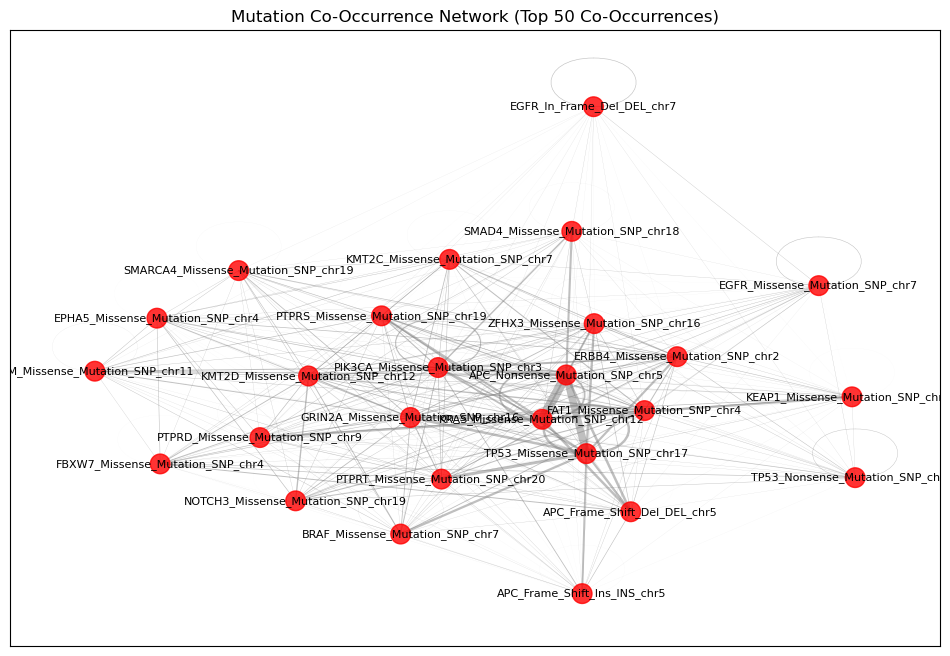

In [96]:
### **Step 4: Visualize a Subgraph of Highly Connected Mutations**
# Get the top 50 most frequently co-occurring mutation pairs
top_mutation_pairs = sorted(mutation_cooccurrence, key=mutation_cooccurrence.get, reverse=True)[:50]

# Extract subgraph containing these mutations
subgraph_nodes = set()
for m1, m2 in top_mutation_pairs:
    subgraph_nodes.add(m1)
    subgraph_nodes.add(m2)

subgraph = G.subgraph(subgraph_nodes)

# Define node colors (all mutations are red)
node_colors = ["red" for _ in subgraph.nodes()]

# Get edge weights (co-occurrence frequency)
edges = nx.get_edge_attributes(subgraph, "weight")

# Apply force-directed layout
pos = nx.spring_layout(subgraph, seed=42, k=0.3)  # k controls node spacing

plt.figure(figsize=(12, 8))

# Draw nodes
nx.draw_networkx_nodes(subgraph, pos, node_size=200, node_color=node_colors, alpha=0.8)

# Draw edges with thickness based on weight
nx.draw_networkx_edges(subgraph, pos, alpha=0.5, width=[w * 15 for w in edges.values()], edge_color="gray")

# Draw labels for top mutations
labels = {node: node for node in subgraph.nodes()}
nx.draw_networkx_labels(subgraph, pos, labels=labels, font_size=8, font_color="black")

# Show plot
plt.title("Mutation Co-Occurrence Network (Top 50 Co-Occurrences)")
plt.show()